# 二手车项目

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 数据加载

In [196]:
train_raw = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
train_raw.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [197]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [198]:
test_raw = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')
test_raw.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [199]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [200]:
# 删除无用列
drop_col = ['SaleID', 'seller', 'offerType', 'regionCode', 'name', 'price']
features = [x for x in train_raw.columns if x not in drop_col]

# 属性分类
num_col = ['power', 'kilometer'] + [x for x in features if 'v' in x]
cat_col = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
date_col = ['creatDate', 'regDate']

# 提取数据
train = train_raw[features]
test = test_raw[features]
label = train_raw['price']

## 数据分布

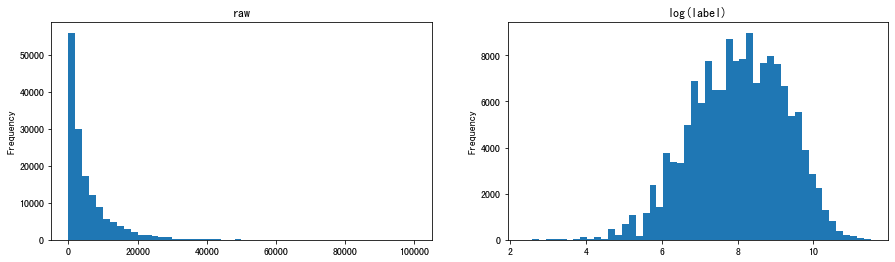

In [201]:
# 标签分布
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
label.plot(kind='hist', bins=50, title='raw')

plt.subplot(1, 2, 2)
np.log(label).plot(kind='hist', bins=50, title='log(label)')

plt.show()

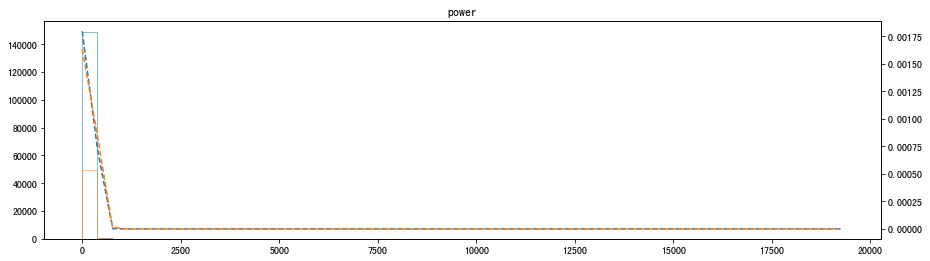

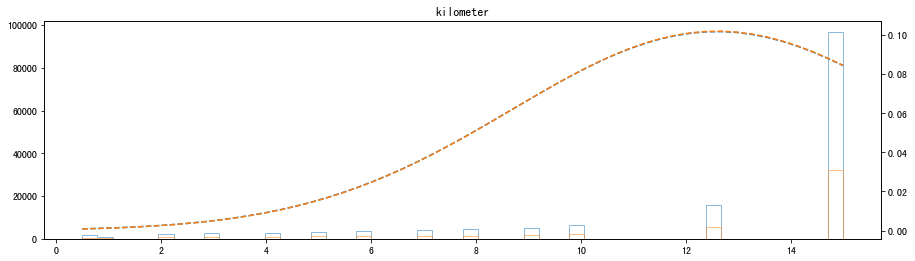

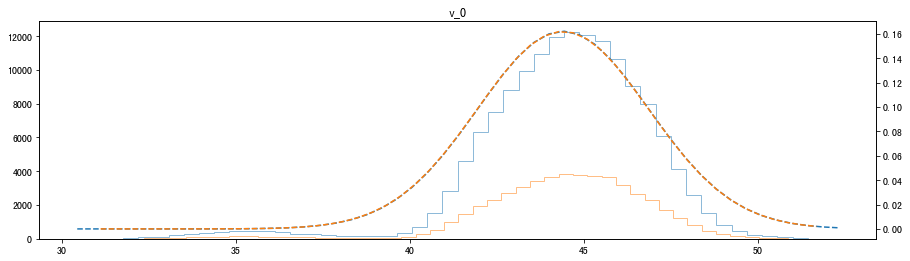

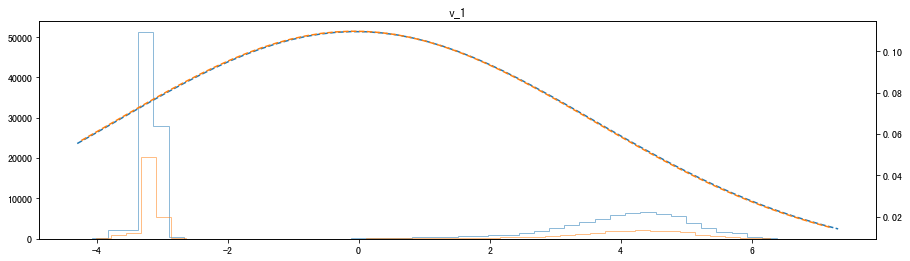

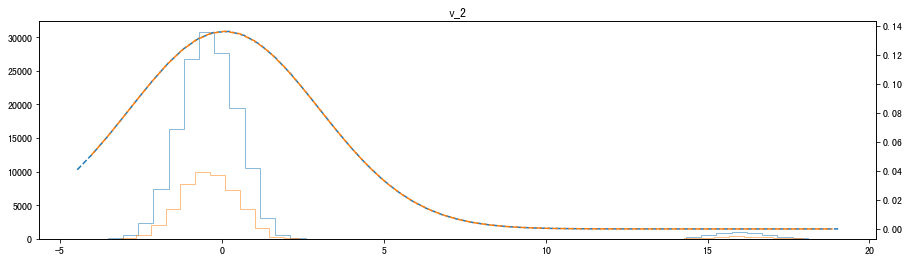

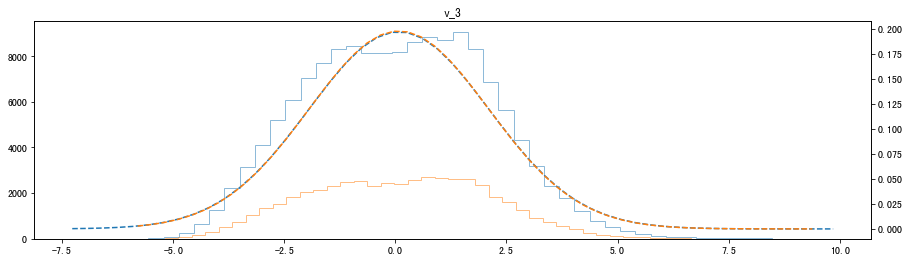

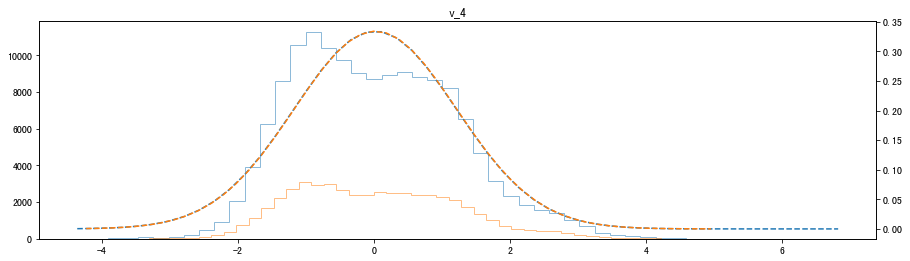

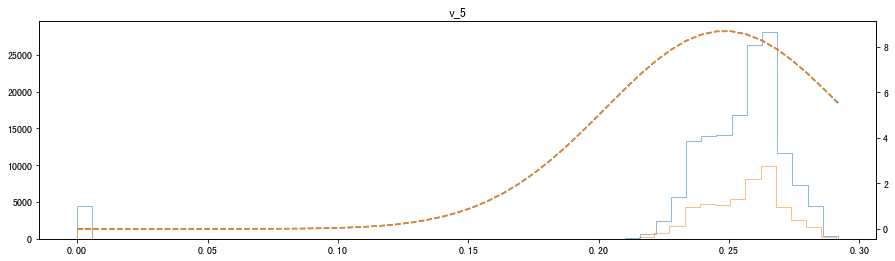

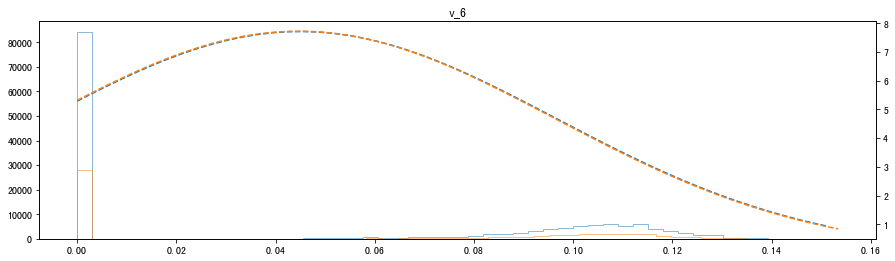

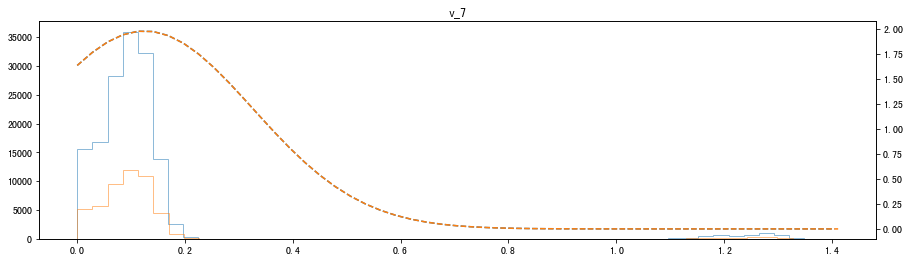

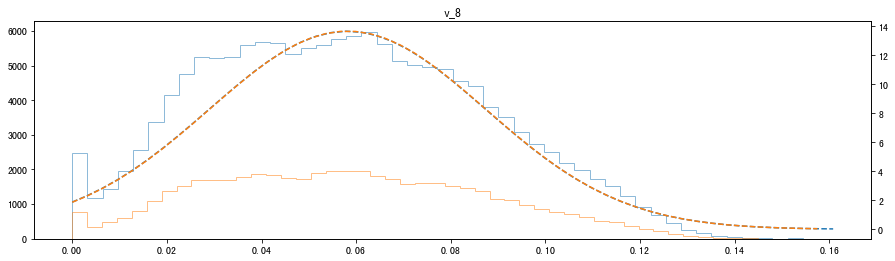

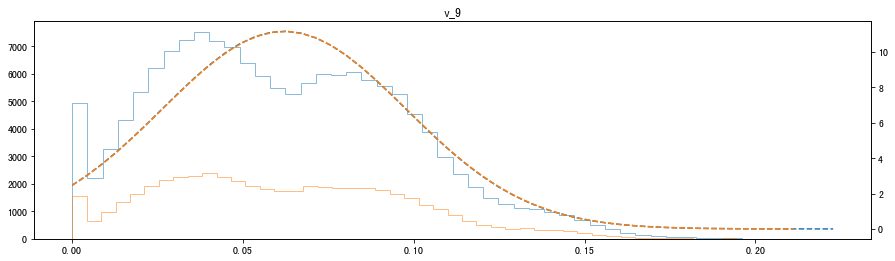

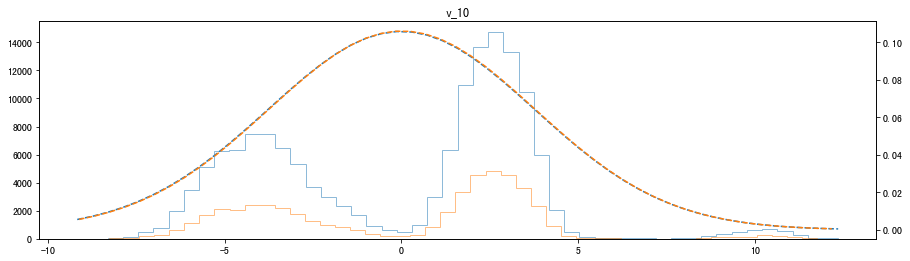

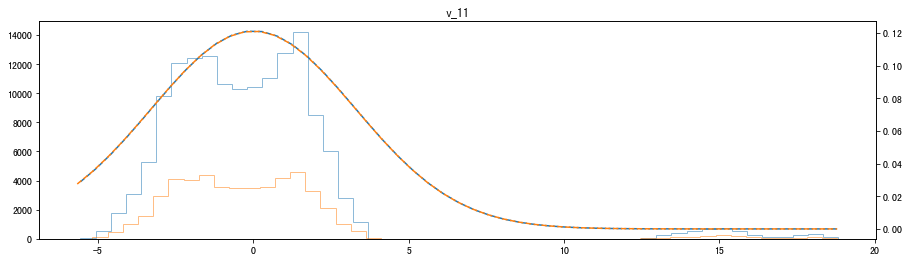

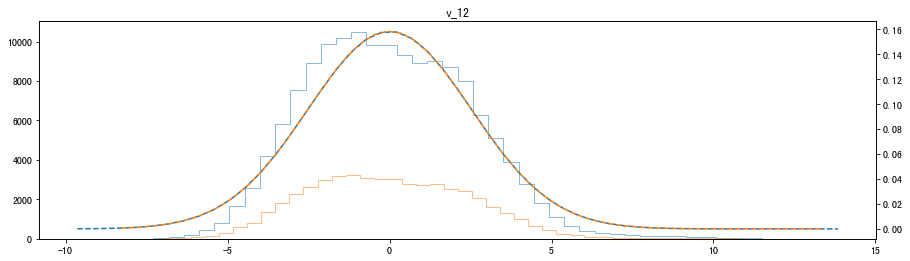

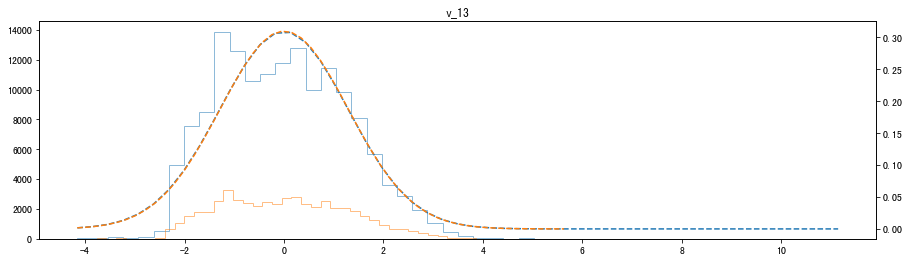

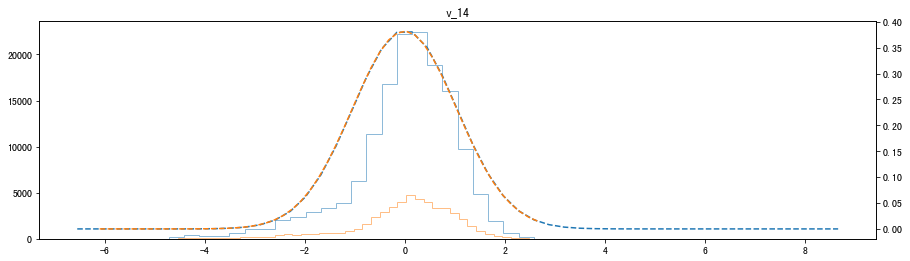

In [202]:
# 变量分布
for i in num_col:
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax2 = ax1.twinx()
    ax1.set_title(i)
    
    n, bins, patches = ax1.hist(train[i], bins=50, alpha=0.5, label='train',histtype='step')
    mu = train[i].mean()
    sigma = train[i].std()
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax2.plot(bins, y, '--')

    n, bins, patches = ax1.hist(test[i], bins=50, alpha=0.5, label='test', histtype='step')
    mu = test[i].mean()
    sigma = test[i].std()
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax2.plot(bins, y, '--')
    
    plt.show()

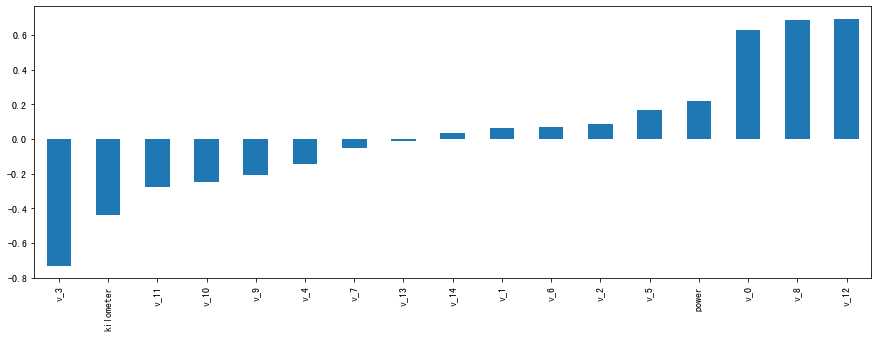

In [203]:
# 连续变量与标签相关性
train[num_col].corrwith(label).sort_values().plot(kind='bar', figsize=(15, 5))
plt.show()

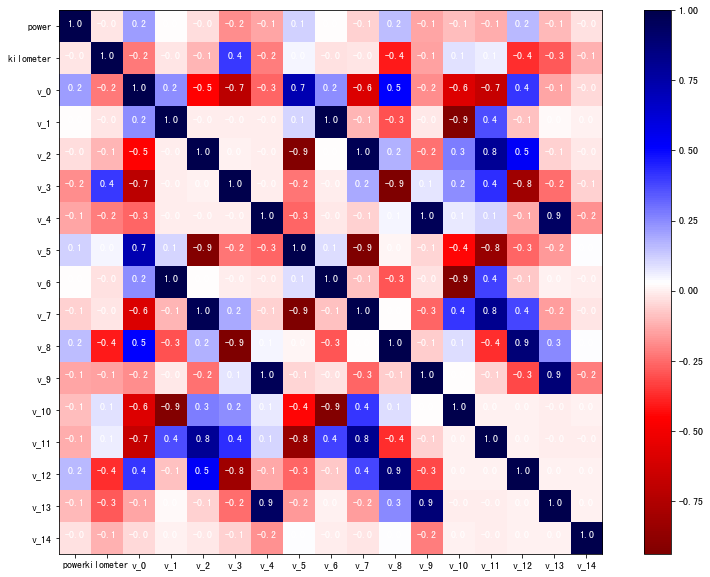

In [204]:
# 连续变量相关性
plt.figure(figsize=(15,10))
corr_data = train[num_col].corr()
plt.imshow(corr_data, cmap='seismic_r')

for i in range(len(num_col)):
    for j in range(len(num_col)):
        plt.text(i, j, '{:.1f}'.format(corr_data.values[i][j]), ha='center', fontsize=10, color='white')
        
plt.xticks(ticks=[x for x in range(len(num_col))], labels=num_col)
plt.yticks(ticks=[x for x in range(len(num_col))], labels=num_col)
plt.colorbar()
plt.show()

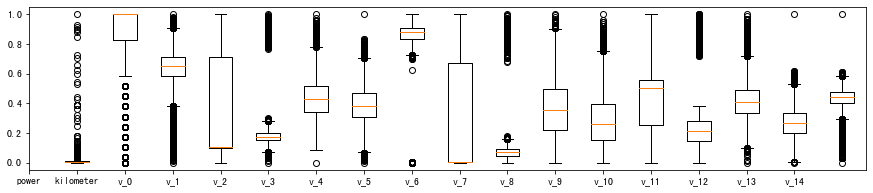

In [205]:
# 连续变量箱线图
from sklearn.preprocessing import MinMaxScaler
temp = MinMaxScaler().fit_transform(train[num_col])
plt.figure(figsize=(15, 3))
plt.boxplot(temp)
plt.xticks(ticks=[x for x in range(len(num_col))], labels=num_col)
plt.show()

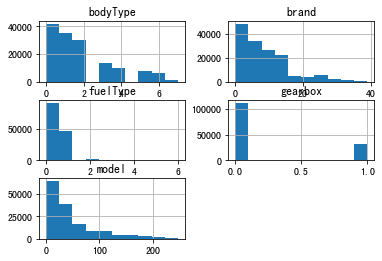

In [206]:
# 离散变量
train[cat_col].hist()
plt.show()

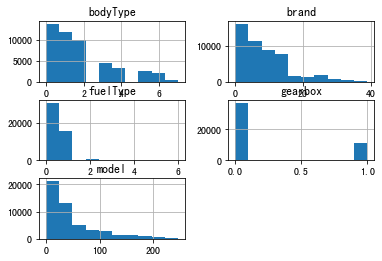

In [207]:
test[cat_col].hist()
plt.show()

In [208]:
# 缺失值
temp = train.isnull().sum()
train_null = temp[temp != 0].reset_index().rename(columns={0:'train'})
temp = test.isnull().sum()
test_null = temp[temp != 0].reset_index().rename(columns={0:'test'})
pd.merge(train_null, test_null, on='index', how='outer')

,index,train,test
0,model,1,NaN
1,bodyType,4506,1504.0
2,fuelType,8680,2924.0
3,gearbox,5981,1968.0


In [209]:
# 非法值
train.select_dtypes('object').columns

Index(['notRepairedDamage'], dtype='object')

In [210]:
cat_col

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

## 特征工程

In [353]:
train_features = train.copy()
test_features = test.copy()

In [354]:
# 时间特征
train_features['creatDate'] = pd.to_datetime(train['creatDate'], format='%Y%m%d')
train_features['regDate'] = pd.to_datetime(train['regDate'], format='%Y%m%d', errors='coerce')

#标记异常

train_features['regDate'].fillna(train_features['regDate'].mean(), inplace=True)

# 新特征
train_features['new_date'] = (train_features['creatDate'] - train_features['regDate']).dt.days

test_features['creatDate'] = pd.to_datetime(test['creatDate'], format='%Y%m%d')
test_features['regDate'] = pd.to_datetime(test['regDate'], format='%Y%m%d', errors='coerce')

#标记异常

test_features['regDate'].fillna(train_features['regDate'].mean(), inplace=True)

# 新特征
test_features['new_date'] = (test_features['creatDate'] - test_features['regDate']).dt.days

# 删除
train_features.drop(date_col, axis=1, inplace=True)
test_features.drop(date_col, axis=1, inplace=True)

In [355]:
# 删除model确实行
train_features['model'].dropna(axis=0, inplace=True)

In [356]:
# 缺失值当新值填充
fill_dict = {'bodyType': 8.0, 'fuelType': 7.0, 'gearbox': 2}
train_features.fillna(value=fill_dict, inplace=True)
test_features.fillna(value=fill_dict, inplace=True)

# 异常值当新值填充
temp_dict = {'0.0': 0, '1.0':1, '-': 2}
fun = lambda x: temp_dict[x]
train_features['notRepairedDamage'] = train_features['notRepairedDamage'].apply(fun)
test_features['notRepairedDamage'] = test_features['notRepairedDamage'].apply(fun)

# model 众数填充
train_features['model'].fillna(train_features['model'].mode()[0], inplace=True)

In [357]:
# 独热编码处理

In [358]:
# 增加 brand 统计特征

In [359]:
# 增加 model 统计特征

In [360]:
# 标签对数处理
log_label = np.log(label)

In [361]:
# 异常值标记

In [362]:
# 多项式处理
from sklearn.preprocessing import PolynomialFeatures

In [363]:
poly = PolynomialFeatures(degree=2)
train_features = poly.fit_transform(train_features)

In [364]:
# 分桶处理

In [365]:
# 相关性删除

## 数据拆分

In [366]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [367]:
# 数据标准化
ss = StandardScaler()
train_ready = ss.fit_transform(train_features)
# test_resdy = ss.transform(test_features)

# 训练数据拆分
train_x, val_x, train_y, val_y, train_y_log, val_y_log = train_test_split(train_ready, label, log_label, test_size=1234)

print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('train_y_log', train_y_log.shape)
print('val_x', val_x.shape)
print('val_y', val_y.shape)
print('val_y_log', val_y_log.shape)

train_x (148766, 325)
train_y (148766,)
train_y_log (148766,)
val_x (1234, 325)
val_y (1234,)
val_y_log (1234,)


## 模型训练

In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve

In [369]:
def plot_learn_curve(estimator, x, y):
    
    train_sizes_abs, train_scores, test_scores = learning_curve(
        estimator=estimator, X=x, y=y, cv=3,
        train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), 
        scoring='neg_mean_absolute_error'
    )
    
    plt.plot(train_scores.mean(axis=1), label='train')
    plt.plot(test_scores.mean(axis=1), label='test')
    plt.axhline(y=0,c="r")
    plt.xticks(ticks=[x for x in range(5)], labels=train_sizes_abs)
    plt.title('验证集 MAE:{:.2f}'.format(mean_absolute_error(lr_predict, val_y)))
    plt.legend()
    plt.grid()
    plt.show()

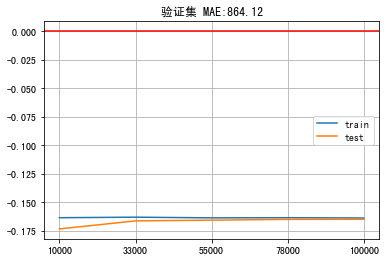

In [370]:
lr = LinearRegression()
lr.fit(train_x, train_y_log)
lr_predict = lr.predict(val_x)
lr_predict = np.exp(lr_predict)

plot_learn_curve(LinearRegression(), train_ready, log_label)

In [371]:
pd.concat([pd.DataFrame(lr_predict, columns=['predict']).describe(), pd.DataFrame(val_y).describe()], axis=1)

,predict,price
count,1234.000000,1234.000000
mean,5999.451237,6211.790924
std,7884.772346,8321.274664
min,32.123575,20.000000
25%,1425.569082,1350.000000
50%,3273.694718,3500.000000
75%,7541.334786,7800.000000
max,97520.579729,92900.000000
